## Focal Loss

Hàm mất mát `Focal` là một sự cải tiến so với hàm mất mát `cross-entropy` tiêu chuẩn cho phân loại nhị phân và đa lớp. Nó được giới thiệu trong bài báo có tiêu đề "Focal Loss for Dense Object Detection" của Tsung-Yi Lin và cộng sự, và chủ yếu được thiết kế cho các nhiệm vụ phát hiện đối tượng để giải quyết bài toán `mất cân bằng giữa các lớp` (class imbalance).

Ý chính đằng sau hàm mất mát Focal là giảm trọng số đóng góp của các ví dụ dễ dàng và tập trung vào những ví dụ khó. Điều này giúp ngăn chặn số lượng lớn các ví dụ tiêu cực dễ dàng từ việc áp đặt lên bộ phát hiện trong quá trình đào tạo.

Công thức cho hàm mất mát Focal cho phân loại nhị phân là:

$$ \text{FL}(p_t) = -\alpha_t (1 - p_t)^\gamma \log(p_t) $$

Trong đó:

- $p_t$ là xác suất của lớp đúng (`true class`). Nếu nhãn lớp đúng là 1, thì $p_t$ là xác suất dự đoán của mô hình cho lớp 1; nếu nhãn lớp đúng là 0, thì $p_t = 1 - $ xác suất dự đoán của mô hình cho lớp 1.

- $\alpha_t$ là một yếu tố cân bằng. Thông thường đặt nằm giữa 0 và 1. Số này được sử dụng để xử lý mất cân bằng lớp.

- $\gamma$ là tham số tập trung (`focusing parameter`) mục đích điều chỉnh mức độ tập trung vào lớp dễ dàng phân loại. Khi $\gamma = 0$, hàm mất mát Focal tương đương với hàm mất mát cross-entropy. Khi $\gamma$ tăng, hiệu ứng của yếu tố điều chỉnh trở nên rõ ràng hơn.

Lợi thế chính của hàm mất mát Focal là nó đưa ra nhiều trọng số hơn cho các ví dụ bị phân loại sai và ít trọng số hơn cho các ví dụ được phân loại tốt. Điều này giúp trong các tình huống mà một số lớp bị đại diện ít hơn hoặc khi mô hình có khả năng bị áp đặt bởi các ví dụ tiêu cực dễ dàng.

### Tham số $\alpha$ trong hàm Focal-loss


1. **Mục đích**: $\alpha$ được sử dụng trong hàm mất mát Focal để xử lý sự mất cân bằng lớp bằng cách điều chỉnh mất mát cho các lớp dương và âm một cách khác nhau. Nó cung cấp một sự cân bằng giữa tầm quan trọng của lớp dương và lớp âm trong việc tính toán mất mát.

2. **Ảnh hưởng lên Giá trị Mất mát**:

   - Đối với lớp dương (tức là khi nhãn thực $y = 1$): Giá trị mất mát được nhân với hệ số $\alpha$.
   
   - Đối với lớp âm (tức là khi nhãn thực $y = 0$): Giá trị mất mát được nhân với hệ số $1 - \alpha$.

3. **Phạm vi Giá trị**:

   - Thông thường, $\alpha$ nằm trong khoảng [0, 1].

   - Giá trị $\alpha$ càng gần 1 càng làm cho mất mát lớp dương được tăng cường và mất mát cho lớp âm được giảm đi.

   - Ngược lại, một giá trị $\alpha$ gần 0 sẽ nhấn mạnh hơn đến lớp âm.

4. **Lợi ích**:

   - Bằng cách điều chỉnh $\alpha$, người ta có thể cung cấp trọng số nhiều hơn cho các lớp được đại diện ít hơn. Điều này có thể đặc biệt hữu ích trong các tình huống có sự mất cân bằng lớp nghiêm trọng, như trong các nhiệm vụ phát hiện đối tượng khi số lượng các ví dụ âm  vượt trội so với các ví dụ dương.

   - Nó đảm bảo rằng mô hình không thiên vị về lớp có nhiều quan sát hơn và xem xét cả hai lớp khi cập nhật trọng số trong quá trình huấn luyện.

5. **Thiết lập $\alpha$**:

   - Trong một số trường hợp, $\alpha$ có thể được thiết lập dựa trên phân phối lớp nghịch đảo. Ví dụ, nếu 80% các ví dụ là âm và 20% là dương, người ta có thể đặt $\alpha$ thành 0,2 cho lớp âm và 0,8 cho lớp dương.

   - Trong những trường hợp khác, giá trị của $\alpha$ có thể được xác định thông qua kiểm định chéo (cross-validation) hoặc các phương pháp điều chỉnh tham số khác.

Tóm lại, tham số $\alpha$ trong hàm mất mát Focal cung cấp một cơ chế để xử lý sự mất cân bằng lớp bằng cách điều chỉnh mất mát cho các ví dụ dương và âm một cách khác nhau. Nó đảm bảo rằng cả hai lớp chính và phụ đều được đại diện đầy đủ trong quá trình đào tạo của mô hình.

### Tham số $\gamma$ trong hàm Focal-loss

$\gamma$ được gọi là "tham số tập trung". Nó đóng một vai trò quan trọng trong việc xác định mức độ mà mô hình nên tập trung vào các lớp bị phân loại sai so với những lớp được phân loại đúng.

Tác động của nó:

1. **Mục đích**: Mục đích chính của tham số $\gamma$ trong hàm mất mát Focal là giảm ảnh hưởng của các lớp dễ phân loại và tăng tầm quan trọng của việc hiệu chỉnh các lớp bị phân loại sai. Điều này đặc biệt hữu ích trong các tình huống mà tập dữ liệu có sự mất cân bằng giữa các lớp.

2. **Tác động của việc Thay đổi $\gamma$**: Thuật ngữ $(1 - p_t)^\gamma$ trong hàm mất mát Focal là yếu tố điều chỉnh. Ở đây, $p_t$ đại diện cho xác suất dự đoán của lớp đúng.

   - Nếu $p_t$ gần bằng 1, nghĩa là ví dụ dễ dàng được phân loại, và $(1 - p_t)^\gamma$ sẽ gần bằng 0, đặc biệt khi $\gamma > 0$.

   - Nếu $p_t$ xa 1 (tức là dự đoán là không chính xác hoặc không chắc chắn), thì $(1 - p_t)^\gamma$ sẽ lớn hơn, tăng ảnh hưởng của ví dụ đó lên hàm mất mát.

   - $\gamma = 0$: Hàm mất mát Focal giảm xuống còn bằng hàm mất mát cross-entropy tiêu chuẩn, vì yếu tố điều chỉnh trở thành 1 cho tất cả các ví dụ.
   
   - $\gamma > 0$: Tăng trọng số của các lớp khó phân loại và giảm trọng số của những lớp dễ phân loại. $\gamma$ càng lớn, mô hình càng tập trung nhiều vào các lớp khó.

3. **Lợi ích**: Bằng cách điều chỉnh $\gamma$, hàm mất mát Focal cho phép các mô hình, đặc biệt trong các nhiệm vụ phát hiện đối tượng, trở nên mạnh mẽ hơn trước số lượng lớn các lớp dễ. Thay vì tiêu tốn tài nguyên tính toán cho các lớp dễ dàng, mô hình tập trung nhiều hơn vào các lớp khó, thường chứa nhiều thông tin hơn.

Tóm lại, tham số $\gamma$ trong hàm mất mát Focal cung cấp một cơ chế để nhấn mạnh việc học từ các lớp bị phân loại sai so với những lớp dễ phân loại. Đó là một công cụ để xử lý sự mất cân bằng lớp và đảm bảo rằng mô hình chú ý nhiều hơn đến các lớp mà nó phân loại sai.

## Ví dụ

### Tunning alpha and gamma


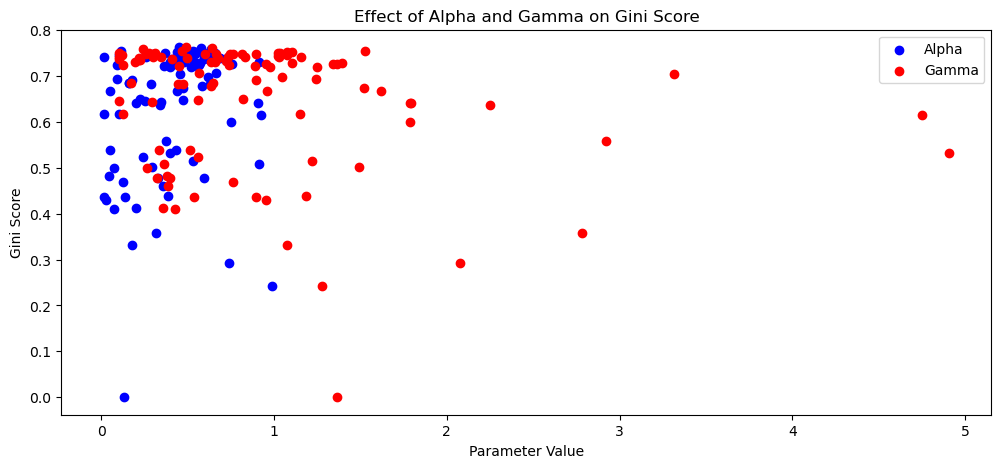

Best Gini score: 0.7631133671742809
Best parameters: {'alpha': 0.45019195857112326, 'gamma': 0.4919531053413074, 'lambda_l1': 6.640753524365382, 'lambda_l2': 9.081726977645413, 'num_leaves': 21, 'feature_fraction': 0.9362220967011345, 'bagging_fraction': 0.4744110361566192, 'bagging_freq': 2, 'min_child_samples': 12}


In [17]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import optuna
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from lightgbm.callback import record_evaluation
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Generate imbalanced data using make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, weights=[0.99, 0.01], random_state=42)  # 99% of class 0 and 1% of class 1
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define Focal Loss for LightGBM
def focal_loss_lgb(y_pred, dtrain, alpha, gamma):
    a, g = alpha, gamma
    y_true = dtrain.get_label()
    p = 1 / (1 + np.exp(-y_pred))
    loss = -(a * y_true + (1 - a) * (1 - y_true)) * ((1 - (y_true * p + (1 - y_true) * (1 - p))) ** g) * (y_true * np.log(p) + (1 - y_true) * np.log(1 - p))
    return 'focal_loss', np.mean(loss), False

# Gini coefficient
def gini(y_true, y_pred):
    return 2 * roc_auc_score(y_true, y_pred) - 1

# Optuna study for tuning alpha and gamma
def objective(trial):
    # Parameters to be tuned
    alpha = trial.suggest_float('alpha', 0.01, 1)
    gamma = trial.suggest_float('gamma', 0.1, 5)
    
    train_set = lgb.Dataset(X_train, y_train)
    val_set = lgb.Dataset(X_val, y_val, reference=train_set)

    param = {
        'objective': 'binary',
        'metric': 'custom',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    # Using record_evaluation to capture validation results without printing
    evals_result = {}
    model = lgb.train(param, 
                      train_set, 
                      valid_sets=[val_set], 
                      feval=lambda preds, dtrain: focal_loss_lgb(preds, dtrain, alpha, gamma), 
                      callbacks=[record_evaluation(evals_result)])
    
    preds = model.predict(X_val)
    return gini(y_val, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100) 

# Results
best_params = study.best_params
best_score = study.best_value

# Plotting
alphas = [trial.params['alpha'] for trial in study.trials]
gammas = [trial.params['gamma'] for trial in study.trials]
scores_focal = [trial.value for trial in study.trials]
plt.figure(figsize=(12, 5))
plt.scatter(alphas, scores_focal, color='blue', label='Alpha')
plt.scatter(gammas, scores_focal, color='red', label='Gamma')
plt.xlabel('Parameter Value')
plt.ylabel('Gini Score')
plt.title('Effect of Alpha and Gamma on Gini Score')
plt.legend()
plt.show()

print(f"Best Gini score: {best_score}")
print(f"Best parameters: {best_params}")

In [18]:
# Optuna study for tuning alpha and gamma
def objective(trial):
    
    train_set = lgb.Dataset(X_train, y_train)
    val_set = lgb.Dataset(X_val, y_val, reference=train_set)

    params_ce = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    # Using record_evaluation to capture validation results without printing
    evals_result_ce = {}
    model_ce = lgb.train(params_ce, train_set, valid_sets=[val_set], callbacks=[record_evaluation(evals_result_ce)])
    preds_ce = model_ce.predict(X_val)    
    return gini(y_val, preds_ce)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100) 

# Results
best_params = study.best_params
best_score = study.best_value
scores_ce = [trial.value for trial in study.trials]
print(f"Best Gini score: {best_score}")
print(f"Best parameters: {best_params}")

Best Gini score: 0.7445008460236886
Best parameters: {'lambda_l1': 5.045686905737897, 'lambda_l2': 8.682377409692112, 'num_leaves': 158, 'feature_fraction': 0.7953399252370615, 'bagging_fraction': 0.43225443468376873, 'bagging_freq': 3, 'min_child_samples': 16}


==> Sử dụng focal loss sau 100 lần thử thì tìm được mô hình có gini tốt hơn so với sử dụng cross entropy

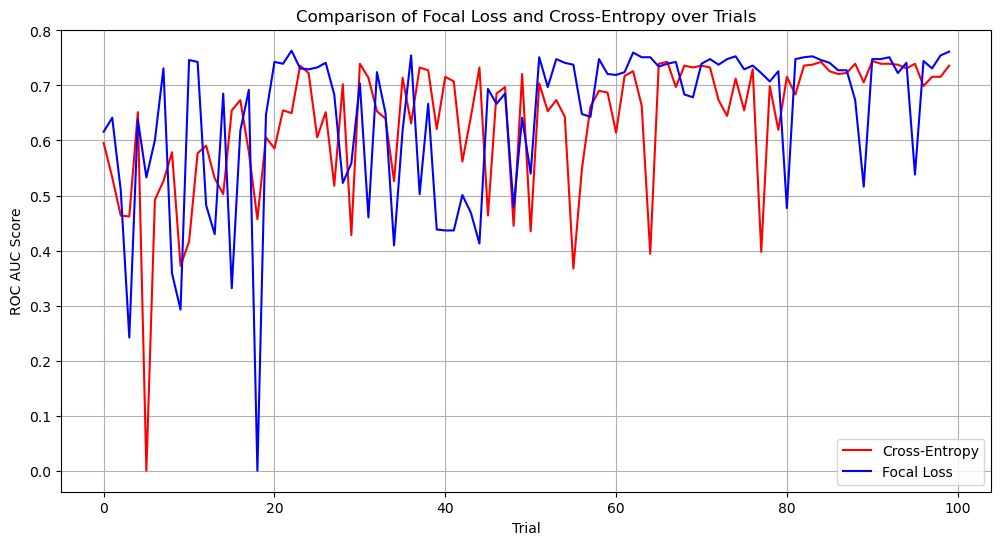

In [19]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(scores_ce, label='Cross-Entropy', color='red')
plt.plot(scores_focal, label='Focal Loss', color='blue')
plt.xlabel('Trial')
plt.ylabel('ROC AUC Score')
plt.title('Comparison of Focal Loss and Cross-Entropy over Trials')
plt.legend()
plt.grid(True)
plt.show()

[LightGBM] [Info] Number of positive: 11, number of negative: 789
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.013750 -> initscore=-4.272871
[LightGBM] [Info] Start training from score -4.272871
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

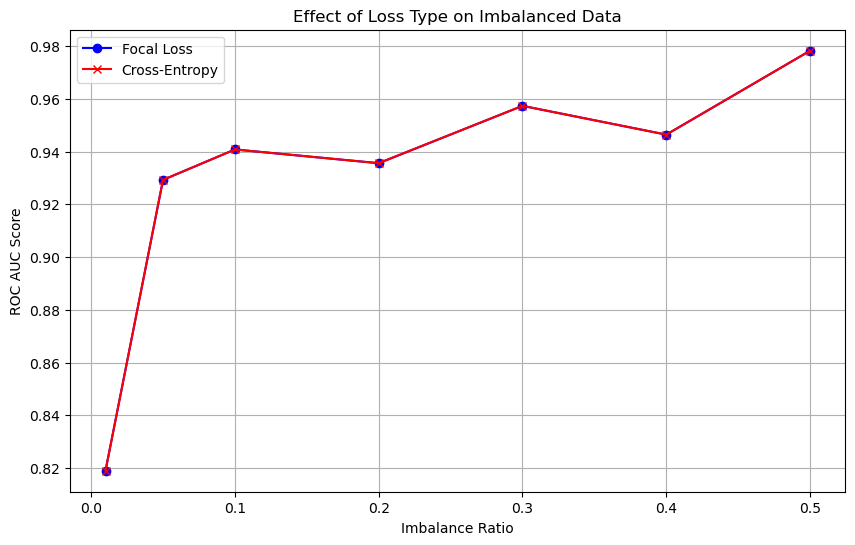

In [39]:
# Initialize lists to store results
focal_scores = []
ce_scores = []
imbalance_ratios = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

for ratio in imbalance_ratios:
    # Generate imbalanced data
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, weights=[1-ratio, ratio], random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    
    train_set = lgb.Dataset(X_train, y_train)
    val_set = lgb.Dataset(X_val, y_val, reference=train_set)
    
    # Train with Focal Loss
    params_focal = {
        'objective': 'binary',
        'metric': 'custom',
        'boosting_type': 'gbdt'
    }
    
    alpha_value = 0.25
    gamma_value = 2.0
    evals_result_focal = {}    
    model_focal = lgb.train(params_focal, train_set, valid_sets=[val_set], 
                        feval=lambda preds, dtrain: focal_loss_lgb(preds, dtrain, alpha_value, gamma_value), 
                        callbacks=[record_evaluation(evals_result_focal)])
    preds_focal = model_focal.predict(X_val)
    roc_focal = roc_auc_score(y_val, preds_focal)
    
    # Train with Cross-Entropy
    params_ce = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt'
    }
    
    evals_result_ce = {} 
    model_ce = lgb.train(params_ce, train_set, valid_sets=[val_set], callbacks=[record_evaluation(evals_result_ce)])
    preds_ce = model_ce.predict(X_val)
    roc_ce = roc_auc_score(y_val, preds_ce)
    
    # Store results
    focal_scores.append(roc_focal)
    ce_scores.append(roc_ce)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(imbalance_ratios, focal_scores, marker='o', label='Focal Loss', color='b')
plt.plot(imbalance_ratios, ce_scores, marker='x', label='Cross-Entropy Loss', color='r')
plt.xlabel('Imbalance Ratio')
plt.ylabel('ROC AUC Score')
plt.title('Effect of Loss Type on Imbalanced Data')
plt.legend()
plt.grid(True)
plt.show()


==> Sử dụng $\alpha$ và $\gamma$ chưa tunning trên nhiều kịch bản imbalance khác nhau, gini không có sự khác biệt 